In [ ]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("Agg")
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Activation, BatchNormalization
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# create generator
datagen = ImageDataGenerator()
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Peaches V Apples', class_mode='binary')
test_it = datagen.flow_from_directory('/content/drive/MyDrive/Kaggle/fruits-360/Test', class_mode='binary')
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 8119 images belonging to 2 classes.
Found 1855 images belonging to 2 classes.
Batch shape=(32, 256, 256, 3), min=0.000, max=255.000


In [ ]:
def createModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))


  return model

In [ ]:

model = createModel()
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(loss='binary_crossentropy',
              optimizer= optimizer,
              metrics=['accuracy'])


In [ ]:
history = model.fit_generator(train_it, steps_per_epoch=16, epochs = 15)



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
16/16 [==============================] - 151s 9s/step - loss: 0.8400 - accuracy: 0.8270
Epoch 2/15
16/16 [==============================] - 139s 9s/step - loss: 0.0793 - accuracy: 0.9821
Epoch 3/15
16/16 [==============================] - 131s 8s/step - loss: 0.0361 - accuracy: 0.9819
Epoch 4/15
16/16 [==============================] - 118s 7s/step - loss: 0.0202 - accuracy: 0.9878
Epoch 5/15
16/16 [==============================] - 113s 7s/step - loss: 0.0037 - accuracy: 1.0000
Epoch 6/15
16/16 [==============================] - 103s 6s/step - loss: 0.0066 - accuracy: 0.9983
Epoch 7/15
16/16 [==============================] - 93s 6s/step - loss: 0.0064 - accuracy: 0.9933
Epoch 8/15
16/16 [==============================] - 86s 5s/step - loss: 0.0102 - accuracy: 0.9964
Epoch 9/15
16/16 [==============================] - 84s 5s/step - loss: 0.0139 - accuracy: 0.9929
Epoch 10/15
16/16 [==============================] - 78s 5s/step - loss: 0.0034 - accuracy: 0.9987
Epoch 11/15
1

In [ ]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/my_model/assets


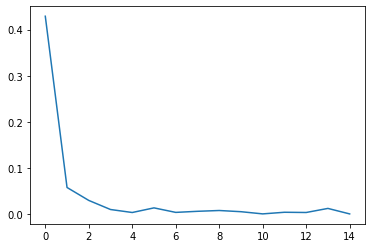

In [ ]:
plt.plot(history.history['loss'])
plt.show()

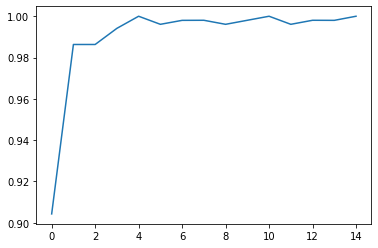

In [ ]:
plt.plot(history.history['accuracy'])
plt.show()

In [ ]:
test = model.evaluate(test_it)

58/58 [==============================] - 490s 9s/step - loss: 0.0959 - accuracy: 0.9720


In [ ]:
# My accuracy increased from implementing batch_normalization, so now I want to apply my model to a harder problem such as MNIST as I have high accuracy on this question